---

# Aerodynamics (mid-term exam, Spring 2018) - Karman-Trefftz airfoil

---

This exam will last 2 hours and 30 minutes and is divided in three parts:

- In the first part, you will use the Karman-Trefftz transform to map a cylinder to a cambered airfoil with a non-zero tail angle at the trailing edge. This is similar to what we have done in the second homework with the Joukowski transform. **(70 points / 100.)**

- In the second part, you will read data from a file and apply the principle of superposition to plot the streamlines and the pressure coefficient. **(30 points.)**

- The last part is a small quiz (about the theory of lift) to glean extra points. **(12 points.)**


**Some recommendations**:

During this exam, you will have to write functions in Python.
Remember, docstrings are cool, they document your functions and help users to understand them.
You can re-use the functions you have implemented in the previous classes or in your homework.

In the first part, we already provide plotting functions to help you, so you do not have to spend too much time on tweaking the figures.
Read the docstring of the functions to understand how to use them.
(Of course, you are free to use your own code for plotting if you prefer.)

In the second part, you will create some figures with Matplotlib.
Pay attention to the quality of your figures: add a title or a caption, some axis labels, a legend (when necessary).

For the quiz in the third part, you can directly modify the markdown cell and fill it with you answers.

**Enjoy!**

In [227]:
# Import your libraries here.

---

## Plotting functions

---

In [228]:
def plot_geometries(z, xi,
                    xlim=(None, None), ylim=(None, None)):
    """
    Plots the geometries (in the z-plane and in the xi-plane)
    on the same axes.
    
    The coordinates of the geometries should be provided
    as 1D Numpy arrays of complex numbers where the real part
    is the x-location and the imaginary part is the y-location.
    
    Parameters
    ----------
    z: numpy.ndarray of complex numbers
        1D array with the complex coordinates in the z-plane.
    xi: numpy.ndarray of complex numbers
        1D array with the complex coordinates in the xi-plane.
    xlim: tuple of 2 floats, optional
        Limits of the x-axis;
        default: (None, None) (limits defined by the geometry).
    ylim: tuple of 2 floats, optional
        Limits of the y-axis;
        default: (None, None) (limits defined by the geometry).
    """
    fig, ax = pyplot.subplots(figsize=(6.0, 6.0))
    ax.grid()
    ax.plot(z.real, z.imag, label=r'$z$-plane',
            linestyle='-', marker='o')
    ax.plot(xi.real, xi.imag, label=r'$\xi$-plane',
            linestyle=':', marker='x')
    ax.legend(loc='best', prop={'size': 14})
    ax.axis('scaled', adjustable='box')
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_xlabel(r'$x$', fontname='DejaVu Serif', fontsize=16)
    ax.set_ylabel(r'$y$', fontname='DejaVu Serif', fontsize=16)
    for method in ['get_xticklabels', 'get_yticklabels']:
        for label in getattr(ax, method)():
            label.set_fontname('DejaVu Serif')
            label.set_fontsize(14)

In [229]:
def plot_meshgrids(Z, XI,
                   xlim=(None, None), ylim=(None, None)):
    """
    Plots the mesh-grids (in the z-plane and in the xi-plane)
    on two horizontally aligned axes.
    
    The mesh-grids should be provided as 2D Numpy arrays of
    complex numbers where the real part is the x-location and
    the imaginary part is the y-location.
    
    Parameters
    ----------
    Z: numpy.ndarray of complex numbers
        2D array with the complex coordinates in the z-plane.
    XI: numpy.ndarray of complex numbers
        2D array with the complex coordinates in the xi-plane.
    xlim: tuple of 2 floats, optional
        Limits of the x-axis;
        default: (None, None) (limits defined by the grids).
    ylim: tuple of 2 floats, optional
        Limits of the y-axis;
        default: (None, None) (limits defined by the grids).
    """
    fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(10.0, 6.0))
    ax[0].set_title(r'$z$-plane',
                    fontname='DejaVu Serif', fontsize=16)
    ax[0].scatter(Z.real, Z.imag, c='black', s=0.5)
    ax[1].set_title(r'$\xi$-plane',
                    fontname='DejaVu Serif', fontsize=16)
    ax[1].scatter(XI.real, XI.imag, c='black', s=0.5)
    for a in ax:
        a.axis('scaled', adjustable='box')
        a.set_xlim(*xlim)
        a.set_ylim(*ylim)
        a.set_xlabel(r'$x$', fontname='DejaVu Serif', fontsize=16)
        a.set_ylabel(r'$y$', fontname='DejaVu Serif', fontsize=16)
        for method in ['get_xticklabels', 'get_yticklabels']:
            for label in getattr(a, method)():
                label.set_fontname('DejaVu Serif')
                label.set_fontsize(14)

In [230]:
def plot_streamlines_and_velocity(psi, W, Z, z,
                                  xlim=(None, None), ylim=(None, None),
                                  n_levels=51, s_quiver=4):
    """
    Plots the streamlines and the velocity field (quiver plot)
    on separate axes.
    
    Parameters
    ----------
    psi: numpy.ndarray of floats
        2D array of the streamfunction.
    W: numpy.ndarray of complex numbers
        2D array of the complex velocity.
    Z: numpy.ndarray of complex numbers
        2D array of the mesh-grid.
    z: numpy.ndarray of complex numbers
        1D array of the geometry.
    xlim: tuple of 2 floats, optional
        Limits of the x-axis;
        default: (None, None) (limits defined by the grids).
    ylim: tuple of 2 floats, optional
        Limits of the y-axis;
        default: (None, None) (limits defined by the grids).
    n_levels: integer, optional
        Number of levels to use for pyplot.contour;
        default: 51.
    s_quiver: positive integer, optional
        Density of the arrows in the quiver
        (the higher the more sparse);
        default: 4.
    """
    fig, ax = pyplot.subplots(nrows=1, ncols=2, figsize=(10.0, 6.0))
    # Add the streamlines.
    ax[0].set_title('Streamlines',
                    fontname='DejaVu Serif', fontsize=16)
    ax[0].contour(Z.real, Z.imag, psi, n_levels,
                  colors='black', linestyles='solid')
    ax[0].plot(z.real, z.imag,
               color='red', linestyle='-', linewidth=1)
    # Add a quiver plot of the velocity field.
    ax[1].set_title('Velocity field',
                    fontname='DejaVu Serif', fontsize=16)
    s = s_quiver
    ax[1].quiver(Z.real[::s, ::s], Z.imag[::s, ::s],
                 W.real[::s, ::s], -W.imag[::s, ::s],
                 angles='uv', scale=30, headwidth=5)
    ax[1].plot(z.real, z.imag,
               color='red', linestyle='-', linewidth=1)
    for a in ax:
        a.axis('equal')
        a.set_xlim(*xlim)
        a.set_ylim(*ylim)
        a.set_xlabel(r'$x$', fontname='DejaVu Serif', fontsize=16)
        a.set_ylabel(r'$y$', fontname='DejaVu Serif', fontsize=16)
        for method in ['get_xticklabels', 'get_yticklabels']:
            for label in getattr(a, method)():
                label.set_fontname('DejaVu Serif')
                label.set_fontsize(14)
    fig.tight_layout()

In [231]:
def plot_pressure_coefficient(cp, Z, z,
                              xlim=(None, None), ylim=(None, None)):
    """
    Plots the filled contour of the field of pressure coefficient.
    
    Parameters
    ----------
    cp: numpy.ndarray of floats
        2D array of the field of pressure coefficient.
    Z: numpy.ndarray of complex numbers
        2D array of the mesh-grid.
    z: numpy.ndarray of complex numbers
        1D array of the geometry.
    xlim: tuple of 2 floats, optional
        Limits of the x-axis;
        default: (None, None) (limits defined by the grids).
    ylim: tuple of 2 floats, optional
        Limits of the y-axis;
        default: (None, None) (limits defined by the grids).
    """
    fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(6.0, 6.0))
    cont_levels = numpy.linspace(-1.0, 1.0, 101)
    ax.set_title('Pressure coefficient',
                 fontname='DejaVu Serif', fontsize=16)
    cont = ax.contourf(Z.real, Z.imag, cp,
                       levels=cont_levels,
                       extend='both')
    ax.plot(z.real, z.imag,
            color='red', linestyle='-', linewidth=1)
    ax.axis('scaled', adjustable='box')
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    fig.subplots_adjust(right=0.9)
    cax = fig.add_axes([0.90, 0.25, 0.05, 0.50])
    cbar_ticks = numpy.linspace(cont_levels.min(),
                                cont_levels.max(),
                                5)
    cbar = fig.colorbar(cont, cax=cax, orientation='vertical',
                        ticks=cbar_ticks)
    cbar.set_label(r'$C_p$', size=16)
    ax.set_xlabel(r'$x$', fontname='DejaVu Serif', fontsize=16)
    ax.set_ylabel(r'$y$', fontname='DejaVu Serif', fontsize=16)
    for method in ['get_xticklabels', 'get_yticklabels']:
        for label in getattr(ax, method)():
            label.set_fontname('DejaVu Serif')
            label.set_fontsize(14)

---

## First part - Karman-Trefftz conformal mapping *(70 pts)*

---

### Step 1 - Conformal mapping *(5 pts)*

The Karman-Trefftz transformation maps a cylinder (defined in the $z$-plane) to an airfoil ($\xi$-plane) that possesses a non-zero tail angle at the trailing edge.

$$\xi = n \frac{\left(1 + \frac{b^2}{z}\right)^n + \left(1 - \frac{b^2}{z}\right)^n}{\left(1 + \frac{b^2}{z}\right)^n - \left(1 - \frac{b^2}{z}\right)^n}$$

where $n = 2 - \frac{\beta}{\pi}$, with $\beta$ the tail angle (in radians) at the trailing edge and $b$ a parameter to control the thickness of the airfoil.

Note that when we choose a zero tail-angle ($\beta = 0$), the Karman-Trefftz transform reduces to the Joukowski transform.

First, we need to create the conformal mapping between the $z$-plane of the cylinder and the $\xi$-plane of the airfoil.

**List of tasks:**

1- Write a function for the conformal mapping that takes the complex coordinates in the $z$-plane as an argument and returns the the comlpex coordinates in the $\xi$-plane.

To check your function, here is what we obtained:
the point $1.2 + 2.3j$ maps into the point $1.62214306992 + 2.56964536463j$ when using $b = 0.9$ and $\beta = 3.4^\circ$.

In [232]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import math
import scipy

b = 0.9
beta = 3.4*np.pi/180
n = 2-beta/np.pi
def xi_change(z,b,n):
    xi = n*((1+b**2/z)**n+(1-b**2/z)**n)/\
           ((1+b**2/z)**n-(1-b**2/z)**n)
    return xi

z_test = 1.2+2.3*1j
xi_test = xi_change(z_test,b,n)
xi_test

(1.6221430699180361+2.569645364630071j)

---

### Step 2 - From a cylinder  to an airfoil *(10 pts)*

Let's use our new function to map a cylinder into a Karman-Trefftz airfoil.

**List of tasks:**

1- Create a cylinder centered at $\left(x_c, y_c\right)$ with radius $R = \sqrt{\left(b - x_c\right)^2 + y_c^2}$ with $N$ points on its surface where the first and last points coincide.

Use the following parameters:
* $x_c = -0.1$, $y_c = 0.2$
* $b = 1.0$
* $\beta = 4^\circ$
* $N = 101$

2- Apply the Karman-Trefftz transformation using the function you previously defined to get the complex coordinates of the cambered airfoil.

3- Plot the two geometries on a figure. (You can use the plotting function `plot_geometries` to save some time.)

4- Find the index **and** the coordinates of the trailing-edge point.

5- Find the coordinates of the first point (index `0`) and last point (index `N - 1`) on the airfoil. Do they coincide with the trailing-edge point?

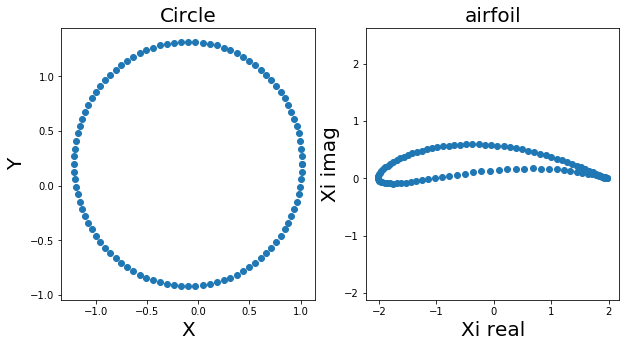

In [233]:
xc = -0.1
yc = 0.2
b =1.0
beta = 4*np.pi/180

N = 101
n = 2-beta/np.pi

R = np.sqrt((b-xc)**2+yc**2)
THE = np.linspace(0,2*np.pi,N)
x_cir = R*np.cos(THE)+xc
y_cir = R*np.sin(THE) +yc
z_cir = x_cir + y_cir*1j

xi_cir = xi_change(z_cir,b,n)
xix_cir = xi_cir.real
xiy_cir =xi_cir.imag

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(x_cir,y_cir)

plt.title('Circle',fontsize=20)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)

plt.subplot(122)
plt.scatter(xix_cir,xiy_cir)
plt.axis('equal')

plt.title('airfoil',fontsize=20)
plt.xlabel('Xi real',fontsize=20)
plt.ylabel('Xi imag',fontsize=20)

In [234]:
#the coordinates and location of the trailing edge
print(np.where(xix_cir==np.max(xix_cir)))
print(xi_cir.real[xix_cir==np.max(xix_cir)],xi_cir.imag[xix_cir==np.max(xix_cir)])

(array([97]),)
[ 1.97767895] [  3.27437749e-05]


In [235]:
# coordinates of first and last points on the airfoil. They share the same space because they are defined at the same angles:
# 0 and 2pi radians
#However, these do not cooincide with the trailing edge
print(xi_cir.real[0],xi_cir.imag[0])
print(xi_cir.real[N-1],xi_cir.imag[N-1])

1.94058692273 0.0159030167426
1.94058692273 0.0159030167426


---

### Step 3 - Mesh-grid in polar coordinates *(5 pts)*

To visualize the flow in a domain, we should probably create a mesh-grid. Let us do it in polar coordinates in the cylinder-plane ($z$-plane).

**List of tasks:**

1- Discretize the mesh-grid using $N_r = 121$ points in the radial direction ($R \leq r \leq R+5$) and $N_\theta = 101$ points on the surface of the cylinder ($0 \leq \theta \leq 2\pi$).

2- Apply the Karman-Trefftz transformation to obtain the mesh-grid in the airfoil-plane ($\xi$-plane). (Yes! You can use the function we created above.)

3- Plot the mesh-grid in both planes. (You can use the plotting function `plot_meshgrids` to save some time.)

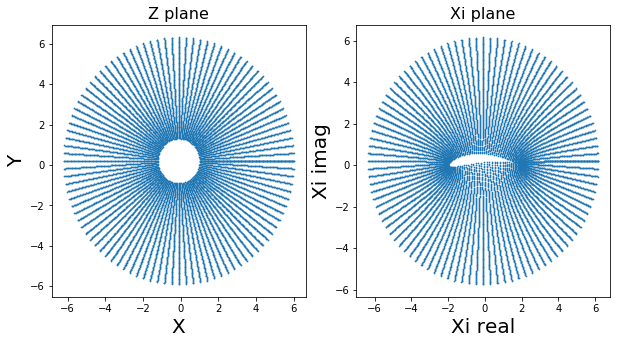

In [236]:
Nr = 121
RAD = np.linspace(R,R+5,Nr)
[RADI,THET]= np.meshgrid(RAD,THE)

x = RADI*np.cos(THET)+xc
y = RADI*np.sin(THET)+yc
z = x+y*1j

xi = xi_change(z,b,n)
xix = xi.real
xiy = xi.imag

plt.figure(figsize=(10,5))
plt.subplot(121)


plt.title('Z plane',fontsize=16)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)

plt.scatter(x,y,s=0.5)

plt.subplot(122)
plt.scatter(xix,xiy,s=0.5)
plt.title('Xi plane',fontsize=16)
plt.xlabel('Xi real',fontsize=20)
plt.ylabel('Xi imag',fontsize=20)




---

### Step 4 - Freestream + doublet = ? *(10 pts)*

We are now going to compute the velocity field around the cylinder in the $z$-plane.

As we now know, the potential flow around a cylinder (with no circulation) can be represented by the superposition of a doublet flow to a uniform freestream flow.

We will use a freestream with speed $U_\infty = 1$ and angle of incidence $\alpha = 0^\circ$.

**List of tasks:**

1- Compute the strength of the doublet to represent the flow around a cylinder of radius $R$ immersed in a freestream flow with speed $U_\infty$?

2(a)- Write a function that returns the velocity field, on a given 2D mesh-grid, due to a freestream.

2(b)- Write a function that returns the streamfunction, on a given 2D mesh-grid, due to a freestream.

3(a)- Write a function that returns the velocity field, on a given 2D mesh-grid, due to a point-doublet.

3(b)- Write a function that returns the streamfunction, on a given 2D mesh-grid, due to a point-doublet.

4- Using those functions, apply the principle of superposition to get the streamfunction and velocity in the cylinder-plane ($z$-plane).

5- Plot the streamlines and the velocity field in the $z$-plane. (You can use the plotting function `plot_streamlines_and_velocity` to save some time.)

In [237]:
u_inf = 1.0
strength_doub = 2*R**2*np.pi*u_inf
strength_doub

def get_freestream_vel(u_inf,alpha,X,Y):
    
    '''
    Returns the freestream velocity
    
    Parameters
    ----------
    u_inf: float
        freestream velocity.
    alpha: float
        angle of attack 
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x component of velocity in freestream
    v: 2D Numpy array of floats
        y component of velocity in freestream
    
    
    '''
     
    u = u_inf*np.cos(alpha)*np.ones(np.shape(X),dtype=float)
    v = u_inf*np.sin(alpha)*np.ones(np.shape(X),dtype=float)
    return u,v

def get_freestream_psi(u_inf,alpha,X,Y):
    
    '''
    Returns the freestream stream function
    
    Parameters
    ----------
    u_inf: float
        freestream velocity.
    alpha: float
        angle of attack 
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        stream function in freestream
    
    
    '''
     
    psi = u_inf*(Y*np.cos(alpha)-X*np.sin(alpha))
    return psi

def get_velocity_doublet(strength, xd,yd, X,Y):
    '''
    Returns the velocity in a doublet
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xv: float
        x-coordinate of the doublet.
    yv: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        X component of doublet-based velocity.
    v: 2D Numpy array of floats
      Y component of doublet-based velocity.
    
    
    '''
    u = (-strength/(2*math.pi)*
        ((X-xd)**2-(Y-yd)**2)/
        ((X-xd)**2 + (Y-yd)**2)**2)
    v = (-strength/(2*math.pi)*2*
        (X-xd)*(Y-yd)/ ((X-xd)**2 + (Y-yd)**2)**2)
    return u,v
def get_stream_function_doublet(strength, xd,yd,X,Y):
    '''
    Returns the stream function in a doublet
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xv: float
        x-coordinate of the doublet.
    yv: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
       doublet-based stream function.
    
    
    '''
    psi = -strength /(2*np.pi)*(Y-yd)/((X-xd)**2 +(Y-yd)**2)
    return psi


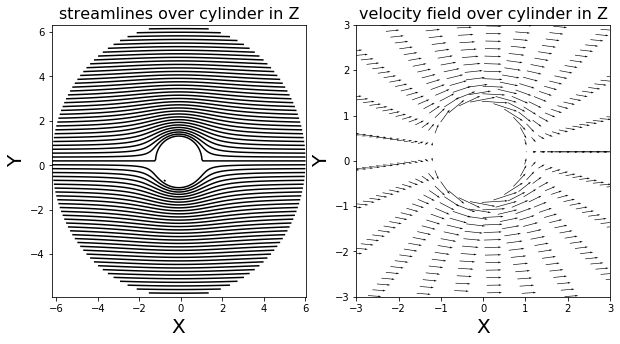

In [238]:
u_free,v_free = get_freestream_vel(u_inf,0.0,x,y)
psi_free = get_freestream_psi(u_inf,0.0,x,y)
u_doub,v_doub = get_velocity_doublet(strength_doub,xc,yc,x,y)
psi_doub= get_stream_function_doublet(strength_doub,xc,yc,x,y)

u = u_free  +u_doub
v = v_free+v_doub
psi = psi_free+psi_doub

plt.figure(figsize=(10,5))
plt.subplot(121)

plt.contour(x,y,psi,levels=np.linspace(np.min(psi),np.max(psi),71),\
            colors='black',linestyles='solid')


plt.title('streamlines over cylinder in Z',fontsize=16)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.subplot(122)
quiv =4
plt.quiver(x[::quiv,::quiv],y[::quiv,::quiv],u[::quiv,::quiv],v[::quiv,::quiv],\
          units='inches',scale=5.5)
plt.xlim(-3,3)
plt.ylim(-3,3)


plt.title('velocity field over cylinder in Z',fontsize=16)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)

---

### Step 5 - Freestream + doublet... Is that enough? *(10 pts)*

Let's use the theory of conformal mapping to obtain the velocity field around the airfoil in the $\xi$-plane

We remember that the complex velocity in the $\xi$-plane is related to the complex velocity in the $z$-plane via the following formula:

$$W_\xi = W_z / \frac{d\xi}{dz}$$

where $W_z = u_z - i v_z$ and $W_\xi = u_\xi - iv_\xi$ are the complex velocity in the $z$-plane and the complex velocity in the $\xi$-plane, respectively.

The derivative of $\xi$ with respect to $z$ is:

$$\frac{d\xi}{dz} = \frac{4n^2b^2}{z^2 - b^4} \frac{\left(1 + \frac{b^2}{z}\right)^n \left(1 - \frac{b^2}{z}\right)^n}{\left[\left(1 + \frac{b^2}{z}\right)^n - \left(1 - \frac{b^2}{z}\right)^n\right]^2}$$

**List of tasks:**

1- Write a function that takes the complex coordinates in the $z$-plane as argument and returns the value of the derivative $\frac{d\xi}{dz}$.

To check your function, here is what we obtained:
the function on the point $1.2 + 2.3j$ returns the point $1.30174942236 + 0.0960827079789j$ when using $b = 0.9$ and $\beta = 3.4^\circ$.

2- Use the function to compute the complexe velocity in the airfoil plane ($\xi$-plane).

3- Plot the streamlines and the velocity field in the $\xi$-plane. (You can use the plotting function `plot_streamlines_and_velocity` to save some time.)

4- Does the streamlines at the trailing-edge look physical? Explain why?
(You can display a zoom at the trailing-edge to support your answer.)

In [239]:
Wz = u - v*1j
def deriv(z,b,n):
    derivative = (4*n**2*b**2/(z**2-b**4))*((1+b**2/z)**n*(1-b**2/z)**n)/\
                                           (((1+b**2/z)**n-(1-b**2/z)**n)**2)
    return derivative
    
z_test2 = 1.2+2.3*1j
b2= 0.9
beta2= 3.4*np.pi/180
n2  = 2-beta2/np.pi
dxi_dz_test = deriv(z_test2,b2,n2)
dxi_dz_test



(1.3017494223627004+0.09608270797891556j)

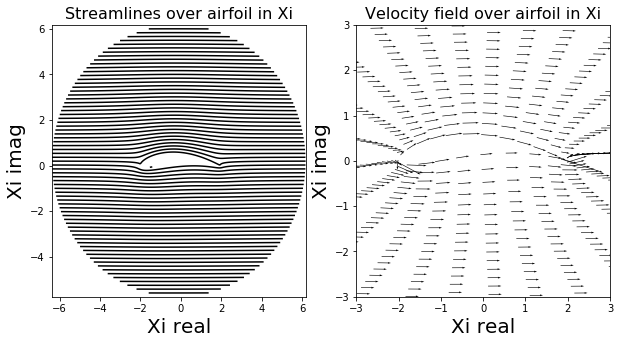

In [240]:
dxi_dz = deriv(z,b,n)
Wxi = Wz/dxi_dz
uxi = Wxi.real
vxi = -Wxi.imag

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.contour(xix,xiy,psi,levels=np.linspace(np.min(psi),np.max(psi),71),\
            colors='black',linestyles='solid')


plt.title('Streamlines over airfoil in Xi',fontsize=16)
plt.xlabel('Xi real',fontsize=20)
plt.ylabel('Xi imag',fontsize=20)
plt.subplot(122)
quiv =4
plt.quiver(xix[::quiv,::quiv],xiy[::quiv,::quiv],uxi[::quiv,::quiv],vxi[::quiv,::quiv],\
          units='inches',scale=5.5)
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.title('Velocity field over airfoil in Xi',fontsize=16)
plt.xlabel('Xi real',fontsize=20)
plt.ylabel('Xi imag',fontsize=20)

(-0.5, 0.5)

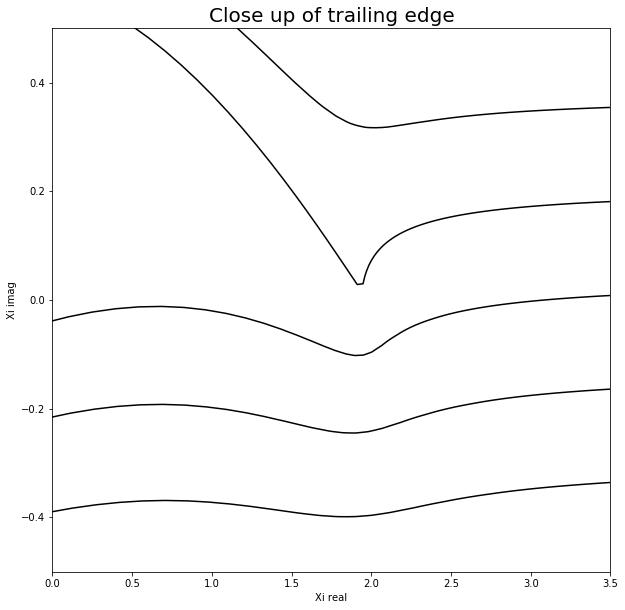

In [241]:
plt.figure(figsize=(10,10))
plt.contour(xix,xiy,psi,levels=np.linspace(np.min(psi),np.max(psi),71),\
            colors='black',linestyles='solid')
plt.title('Close up of trailing edge', fontsize =20)
plt.xlabel('Xi real')
plt.ylabel('Xi imag')
plt.xlim(0,3.5)
plt.ylim(-0.5,0.5)

## The streamlines seen in the above figure are not physical, as there is a sudden near-discontinuity of flow going around the trailing edge. It should not change this suddenly.

---

### Step 6 - Pressure coefficient *(10 pts)*

Let's have a look at the pressure coefficient to check what's going on.

**List of tasks:**

1- Compute and plot the pressure coefficient in both planes. (You can use the plotting function `plot_pressure_coefficient` to save some time.)

2- Find the minimum value of the pressure coefficient on the surface of the airfoil.

3- Find the index of the stagnation points?

4- The angle of incidence of the freestream is zero, so explain why the rear stagnation point is not at the trailing edge?

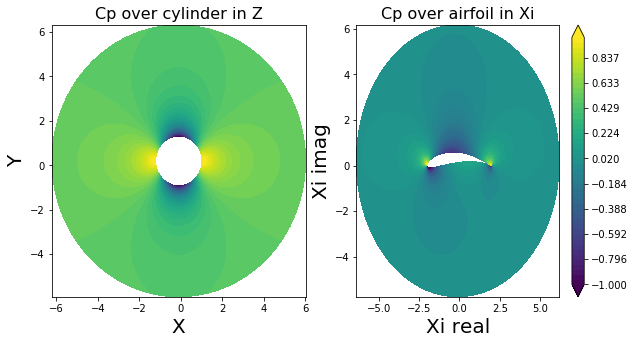

In [242]:
cpz = 1 - (u**2+v**2)/u_inf**2
cpxi = 1 - (uxi**2+vxi**2)/u_inf**2

plt.figure(figsize=(10,5))
plt.subplot(121)
cont1 = plt.contourf(x,y,cpz,levels = np.linspace(np.min(cpz),np.max(cpz),50),\
                    cmap=plt.cm.viridis,extend='both')

plt.title('Cp over cylinder in Z',fontsize=16)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)

plt.subplot(122)
cont2 = plt.contourf(xix,xiy,cpxi,levels = np.linspace(-1,1,50),\
                    cmap=plt.cm.viridis,extend='both')
cbar = plt.colorbar(cont2,orientation='vertical')
plt.title('Cp over airfoil in Xi',fontsize=16)
plt.xlabel('Xi real',fontsize=20)
plt.ylabel('Xi imag',fontsize=20)

In [243]:
#minimum airfoil CP value
np.min(cpxi)

-307.72552093227057

In [244]:
np.where(np.round(u**2+v**2,3)==0)
#the index of stagnation should be the same between cylinder and airfoil spaces

(array([  0,  50, 100]), array([0, 0, 0]))

## The index of the trailing edge is at [97,0], whereas the stagnation point closest to the trailing edge is at [100,0].  There is a difference of three index points because the sharp trailing edge creates an artificial angle of attack when it interacts with the flow. This causes a suction arounnd the trailing edge, putting the stagnation point on the upper surface. 

---

### Step 7 - Kutta condition! *(10 pts)*

We need to satisfy the [Kutta condition](http://en.wikipedia.org/wiki/Kutta_condition),
>"A body with a sharp trailing edge which is moving through a fluid will create about itself a circulation of sufficient strength to hold the rear stagnation point at the trailing edge."

**List of tasks:**

1- Compute the circulation (strength of the point-vortex) required to satisfy the Kutta condition (i.e. to bring the rear stagnation point at the trailing-edge).

2(a)- Write a function that returns the velocity field, on a given 2D mesh-grid, due to a point-vortex.

2(a)- Write a function that returns the stremfunction, on a given 2D mesh-grid, due to a point-vortex.

3- Apply the principle of superposition to take into account the effect of the vortex.

4- Compute and plot the streamlines and velocity field in both planes. (You can use the plotting function `plot_streamlines_and_velocity` to save some time.)

5- Compute and plot the pressure coefficient in both planes. (You can use the plotting function `plot_pressure_coefficient` to save some time.)

6- What are the index of the stagnation points? Is it what you were expecting? Explain why.

In [245]:
# since the stagnation point is three index values away, we need to bring it 
#back to the trailing edge
# we know that each index represents an angular differnce of 360/100, and we
# have three times that. We will solve for an new angle of attack to place the
#stagnation point back at [97,0]

alpha = 3*(360/100)*np.pi/180
strength_vor = -4*u_inf*np.pi*R*np.sin(-alpha)
strength_vor




2.6326380380471495

In [246]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function in a vortex
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (4 * math.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

x0,y0 =0.0,0.0

u_vor, v_vor = get_velocity_vortex(strength_vor,x0,y0,x,y)
psi_vor =get_stream_function_vortex(strength_vor,x0,y0,x,y)

u_final = u+ u_vor
v_final = v+v_vor
psi_final = psi+psi_vor

Wz = u_final-v_final*1j
dxi_dz = deriv(z,b,n)
Wxi = Wz/dxi_dz
uxi = Wxi.real
vxi = -Wxi.imag

cpz = 1- (u_final**2+v_final**2)/u_inf**2
cpxi = 1-(uxi**2+vxi**2)/u_inf**2


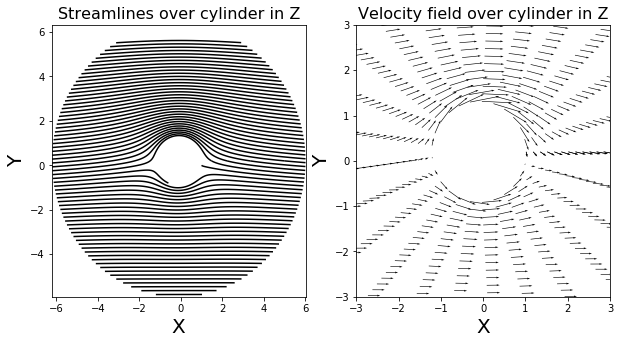

In [247]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.contour(x,y,psi_final,levels=np.linspace(np.min(psi),np.max(psi),71),\
            colors='black',linestyles='solid')


plt.title('Streamlines over cylinder in Z',fontsize=16)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.subplot(122)
quiv =4
plt.quiver(x[::quiv,::quiv],y[::quiv,::quiv],u_final[::quiv,::quiv],v_final[::quiv,::quiv],\
          units='inches',scale=5.5)
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.title('Velocity field over cylinder in Z',fontsize=16)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)

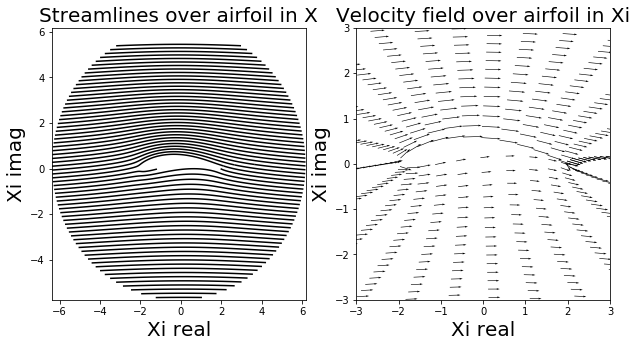

In [248]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.contour(xix,xiy,psi_final,levels=np.linspace(np.min(psi),np.max(psi),71),\
            colors='black',linestyles='solid')


plt.title('Streamlines over airfoil in X',fontsize=20)
plt.xlabel('Xi real',fontsize=20)
plt.ylabel('Xi imag',fontsize=20)
plt.subplot(122)
quiv =4
plt.quiver(xix[::quiv,::quiv],xiy[::quiv,::quiv],uxi[::quiv,::quiv],vxi[::quiv,::quiv],\
          units='inches',scale=5.5)
plt.xlim(-3,3)
plt.ylim(-3,3)

plt.title('Velocity field over airfoil in Xi',fontsize=20)
plt.xlabel('Xi real',fontsize=20)
plt.ylabel('Xi imag',fontsize=20)

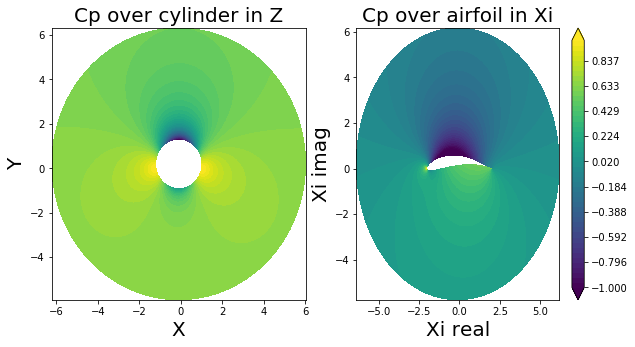

In [249]:


plt.figure(figsize=(10,5))
plt.subplot(121)
cont1 = plt.contourf(x,y,cpz,levels = np.linspace(np.min(cpz),np.max(cpz),50),\
                    cmap=plt.cm.viridis,extend='both')


plt.title('Cp over cylinder in Z',fontsize=20)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.subplot(122)
cont2 = plt.contourf(xix,xiy,cpxi,levels = np.linspace(-1,1,50),\
                    cmap=plt.cm.viridis,extend='both')
cbar = plt.colorbar(cont2,orientation='vertical')
plt.title('Cp over airfoil in Xi',fontsize=20)
plt.xlabel('Xi real',fontsize=20)
plt.ylabel('Xi imag',fontsize=20)

In [250]:
np.where(np.round(u_final**2+v_final**2,2)<=0.01)
#stagnation points


(array([52, 53, 96, 97]), array([0, 0, 0, 0]))

## As seen, we have brought the stagantion point back to [97,0] after adding in a vortex with an artificial angle of attack.  This is expected, as the stagnation point is now at the trailing edge. We have also added three index points to the leading edge stagnation point by implementing this method. This is also expected because using an angle of attack will bring the stagnation points closer to the center of the lower surface of the airfoil.

---

### Step 8 - What about the lift and drag? *(10 pts)*

The drag is the force in the direction of the motion of the airfoil;
the lift is the force perpendicular.

**List of tasks:**

1- Assuming a density $\rho=1$ and a farfield pressure $p_\infty=0$, compute the lift in two ways:
* using the Kutta-Joukowski theorem,
* numerically integrating the pressure along the surface of the cylinder ($L = -\oint p \times \sin{\theta} dA$).

2- Compute the drag by numerically integrating the pressure along the surface of the cylinder ($D = -\oint p \times \cos{\theta} dA$). What's the value? Is it what you were expecting? Explain why?

In [251]:
from scipy.integrate import simps
rho =1
P_inf = 0

#1 KJ thm
L1 = strength_vor*rho*u_inf
L2 = -simps(cpz[:,0]*(0.5*u_inf**2*rho)*R*np.sin(THE[:]),THE[:])


D = -simps(cpz[:,0]*(0.5*u_inf**2*rho)*R*np.cos(THE[:]),THE[:])
print(L1,L2, D)

2.63263803805 2.57230732949 0.00383897390015


## The lift values are very close, and the drag value is almost zero. This is expected, as there should be no drag in a potential flow, and this is very close to zero.

---

## Second part - Sources and vortices *(30 pts)*

---

In the first part of the exam, we have used a conformal mapping and the complex-variable theory to model the flow around an airfoil.

Here, we provide you a set of points which represents the previously used Karman-Trefftz airfoil, as well as the source strength and the vortex strength associated with each point.

You will need to load data from a file and apply the principle of superposition to get the velocity field, on a 2D Cartesian grid, generated by those singularities.

We are going to use the same freestream conditions: speed $U_\infty = 1$ with angle of incidence $\alpha = 0^\circ$.

The file `karmantrefftz_data.txt` contains $N$ lines (where $N$ is the number of points used to discretize the airfoil) and 4 columns (x-coordinates, y-coordinates, vortex strengths, and source strengths).

You are problably wondering how we obtained those source strengths and vortex strengths.
Well, they are the solution from the source-vortex panel method that we are going to implement during the second part of the semester.

**List of tasks:**

1- Load the data from the file `karmantrefftz_data.txt` using the Numpy function [`numpy.loadtxt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). (You should set the keyword argument `unpack` to `True` when using the Numpy function `numpy.loadtxt()`.)

2- Create a $121 \times 121$ Cartesian grid that covers the domain $[-2.5, 2.5]\times[-1.0, 1.0]$.

3- Write a function to compute the velocity field, on a given 2D mesh-grid, due to a source-point. (You can re-use a previously implemented function.)

4- Write a function to compute the velocity field, on a 2D mesh-grid, due to a vortex-point. (You can re-use a previously implemented function.)

5- Compute the velocity field generated by the freestream, the source-points, and the vortex-points and plot the streamlines using the Matplotlib function [`pyplot.streamplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.streamplot.html).

6- Compute the field of pressure coefficient and plot its filled contour using the Matplotlib function [`pyplot.contourf()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html). 

7- What is the maximum pressure coefficient and what are the coordinates of that point? (Add the point to the figure.)

8- Calculate the lift using the Kutta-Joukowski theorem (assume density $\rho = 1$).

In [252]:
info = np.loadtxt('karmantrefftz_data.txt')
x_coor  = info[:,0]
y_coor = info[:,1]
vor =info[:,2]
source = info[:,3]

x_start, x_end = -2.5,2.5
y_start,y_end = -1.0,1.0
Ncart = 121
x2 = np.linspace(x_start,x_end,Ncart)
y2 = np.linspace(y_start,y_end,Ncart)

[X,Y] = np.meshgrid(x2,y2)

def get_velocity_source(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a sources along the airfoil by using superposition
    
    Parameters
    ----------
    strength: float
        Strength of the all sources along the airfoil
    xs: float
        x-coordinates of the sources along the airfoil
    ys: float
        y-coordinates of the sources along the airfoil
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    U: 2D Numpy array of floats
        x-component of the velocity vector field.
    V: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    
    i = np.zeros((100,1),dtype=float)
    u = 0
    v = 0
    U = 0
    V = 0
    
    
    for i in range (0,len(source)-1):
        u = (strength[i] / (2 * np.pi)) * (X - xs[i]) / ((X - xs[i])**2 + (Y - ys[i])**2)
        v = (strength[i] / (2 * np.pi)) * (Y - ys[i]) / ((X - xs[i])**2 + (Y - ys[i])**2)
        U = u+ U
        V = v+ V
    
    
    return U, V

def get_v_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = 0
    v = 0
    U =0
    V = 0
    
    for i in range(0,len(source)-1):
    
        u = +strength[i] / (2 * math.pi) * (Y - yv[i]) / ((X - xv[i])**2 + (Y - yv[i])**2)
        v = -strength[i] / (2 * math.pi) * (X - xv[i]) / ((X - xv[i])**2 + (Y - yv[i])**2)
    
        U = u+ U
        V = v+ V
    
    
    return U, V



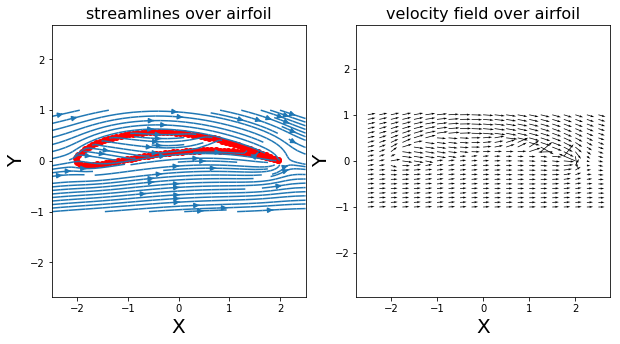

In [253]:
u_sour,v_sour = get_velocity_source(source,x_coor,y_coor,X,Y)
u_vort,v_vort = get_v_vortex(vor,x_coor,y_coor,X,Y)

U = u_sour +u_inf+u_vort
V = v_sour+v_vort

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.streamplot(X,Y,U,V)
plt.scatter(x_coor,y_coor,color = 'red')
plt.axis('equal')

plt.title('streamlines over airfoil',fontsize=16)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)

plt.subplot(122)
quiv =6
plt.quiver(X[::quiv,::quiv],Y[::quiv,::quiv],U[::quiv,::quiv],V[::quiv,::quiv],\
          units='inches',scale=10)
plt.axis('equal')

plt.title('velocity field over airfoil',fontsize=16)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)

0.993013715325
(array([59]), array([111]))


(-2.5, 2.5, -1.0, 1.0)

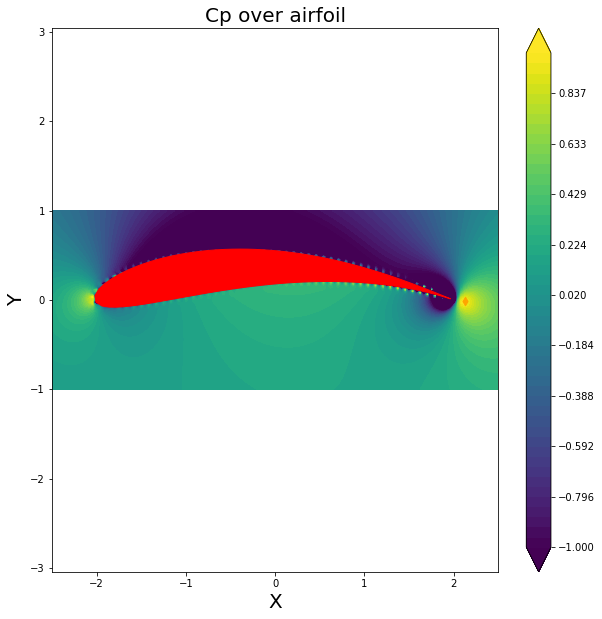

In [254]:
cp = 1- (U**2+V**2)/u_inf**2

#max pressure coefficient
print(np.max(cp))
print(np.where(cp==np.max(cp)))

plt.figure(figsize=(10,10))
cont3 =plt.contourf(X,Y,cp,levels=np.linspace(-1,1,50),cmap=plt.cm.viridis,extend='both')
plt.fill(x_coor,y_coor,color='red')
cbar = plt.colorbar(cont3,orientation='vertical')
plt.title('Cp over airfoil',fontsize=20)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.scatter(X[59,111],Y[59,111],marker='d', color='orange')
plt.axis('equal')

In [255]:
#lift uses the sum of all vorticies
rho = 1
Lift = sum(vor)*rho*u_inf
Lift

2.4471832065550125

---

## Third part - Quiz (extra points - *12 pts*)

---

1- What property of the fluid causes the creation of circulatory motion in the air around a spinning ball that causes it to swerve?

    Ans: viscosity

2- Imagine a ball that rotates forwards as it is moving, what will happen to range of the ball? Will it decrease or increase? Explain why.

    Ans:The range will decrease, as the movement of the top of the ball will act in the opposite direction of the freestream flow. This will cause the pressure on the top of the ball to be higher than the bottom, thus decreasing the range.

3- What name is given to the effect that allows a rotating cylinder to replace a sail in a wind-powered vehicle?

    Ans: Magnus Effect

4- Do you have rotation in a shear flow? Explain why.

    Ans:Yes, for example, in a boundary layer, the velocity is stagnant at the surface a velocity gradient is formed as you move away from the wall. If an object is placed in this flow, the its outer side will move faster than its inner side, causing rotation.

---